# imports

In [65]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import BinaryCrossentropy
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Data

In [66]:
URL='https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'

col_names=["id", "clump_thickness", "un_cell_size", "un_cell_shape", "marginal_adheshion", "single_eph_cell_size"
           , "bare_nuclei", "bland_chromatin","normal_nucleol","mitoses", "class"]

df=pd.read_csv(URL,names=col_names)
print(df.head(5))

        id  clump_thickness  un_cell_size  un_cell_shape  marginal_adheshion  \
0  1000025                5             1              1                   1   
1  1002945                5             4              4                   5   
2  1015425                3             1              1                   1   
3  1016277                6             8              8                   1   
4  1017023                4             1              1                   3   

   single_eph_cell_size bare_nuclei  bland_chromatin  normal_nucleol  mitoses  \
0                     2           1                3               1        1   
1                     7          10                3               2        1   
2                     2           2                3               1        1   
3                     3           4                3               7        1   
4                     2           1                3               1        1   

   class  
0      2  
1      2  

<AxesSubplot:>

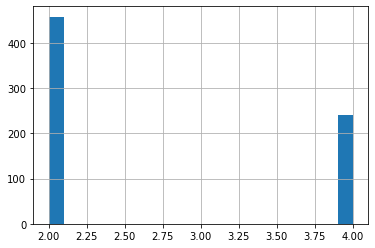

In [67]:
df['class'].hist(bins=20)

In [68]:
df['class'] = np.where(df['class'] == 2, 0, 1)


In [69]:
df=df[df['bare_nuclei']!='?']
df.bare_nuclei = pd.to_numeric(df.bare_nuclei)
df.pop('id')

0      1000025
1      1002945
2      1015425
3      1016277
4      1017023
        ...   
694     776715
695     841769
696     888820
697     897471
698     897471
Name: id, Length: 683, dtype: int64

In [70]:
train, test = train_test_split(df, test_size = 0.2)

train_y=train.pop('class')
test_y=test.pop('class')

In [71]:
train_describe=train.describe()
train_describe=train_describe.transpose()
train_describe

,count,mean,std,min,25%,50%,75%,max
clump_thickness,546.0,4.362637,2.776110,1.0,2.0,4.0,5.0,10.0
un_cell_size,546.0,3.075092,3.018573,1.0,1.0,1.0,4.0,10.0
un_cell_shape,546.0,3.157509,2.976499,1.0,1.0,1.0,5.0,10.0
marginal_adheshion,546.0,2.844322,2.883604,1.0,1.0,1.0,4.0,10.0
single_eph_cell_size,546.0,3.179487,2.172560,1.0,2.0,2.0,4.0,10.0
bare_nuclei,546.0,3.496337,3.654956,1.0,1.0,1.0,6.0,10.0
bland_chromatin,546.0,3.375458,2.376502,1.0,2.0,3.0,4.0,10.0
normal_nucleol,546.0,2.831502,3.010227,1.0,1.0,1.0,4.0,10.0
mitoses,546.0,1.591575,1.724045,1.0,1.0,1.0,1.0,10.0


In [72]:
def norm(x):
    return (x - train_describe['mean']) / train_describe['std']

In [73]:
x_train_norm=norm(train)
x_test_norm=norm(test)


In [74]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train_norm.values, train_y.values))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test_norm.values, test_y.values))

In [80]:
batch_size = 32
train_dataset = train_dataset.shuffle(buffer_size=len(x_train_norm)).batch(batch_size)
test_dataset =  test_dataset.batch(batch_size=batch_size)

# Model

In [77]:
class BreastCancerModel(Model):
    
    def __init__(self):
        
        super().__init__()
        self.dense1=Dense(128, activation='relu')
        self.dense2=Dense(64, activation='relu')
        self.out=Dense(1, activation='sigmoid')
        
    def call(self, inputs):
        x=self.dense1(inputs)
        x=self.dense2(x)
        x=self.out(x)
        return x
    

In [78]:
model=BreastCancerModel()
model.compile(optimizer=RMSprop(learning_rate=0.001),
             loss=BinaryCrossentropy(),
             metrics="accuracy")
model.fit(train_dataset, epochs=5)

Epoch 1/5
18/18 [==============================] - 1s 2ms/step - loss: 0.2759 - accuracy: 0.9707
Epoch 2/5
18/18 [==============================] - 0s 2ms/step - loss: 0.0966 - accuracy: 0.9799
Epoch 3/5
18/18 [==============================] - 0s 2ms/step - loss: 0.0649 - accuracy: 0.9799
Epoch 4/5
18/18 [==============================] - 0s 2ms/step - loss: 0.0567 - accuracy: 0.9817
Epoch 5/5
18/18 [==============================] - 0s 2ms/step - loss: 0.0525 - accuracy: 0.9817


In [79]:
model.evaluate(test_dataset)

5/5 [==============================] - 0s 3ms/step - loss: 0.1472 - accuracy: 0.9489


[0.14719678461551666, 0.9489051103591919]